<img src="Header.png" alt="Python Cientifico de" style="width: 1000px;"/>

# Introducción a SymPy

![](http://sympy.org/static/images/logo.png)

__SymPy es una biblioteca de Python para matemática simbólica__.  
Apunta a convertirse en un __S__istema de __A__lgebra __C__omputacional (__CAS__) con todas sus prestaciones manteniendo el código tan simple como sea posible para manterlo comprensible y fácilmente extensible.  

SymPy está __escrito totalmente en Python y no requiere bibliotecas adicionales__. _Este proyecto comenzó en 2005, fue lanzado al público en 2007 y a él han contribuido durante estos años cientos de personas._

_ Otros CAS conocidos son Mathematica y Maple, sin embargo ambos son software privativo y de pago. 

Veremos cómo:

* Crear símbolos y expresiones.
* Manipular expresiones (simplificación, expansión...)
* Calcular derivadas e integrales.
* Límites y desarrollos en serie.
* Resolución de ecuaciones.
* Resolción de EDOs.
* Matrices

Sin embargo, SymPy no acaba aquí ni mucho menos...

## Documentación & SymPy Live Shell

In [11]:
from IPython.display import HTML
HTML('<iframe src="http://docs.sympy.org/latest/index.html" width="700" height="400"></iframe>')

## SymPy Gamma

In [12]:
HTML('<iframe src="http://www.sympygamma.com/input/?i=integrate%281+%2F+%281+%2B+x^2%29%29" width="700" height="400"></iframe>')

## Creación de símbolos

Lo primero, como siempre, es importar aquello que vayamos a necesitar. La manera usual de hacerlo con SymPy es importar la función `init_session`:
```
from sympy import init_session
init_session(use_latex=True)```

 Esta función ya se encarga de importar todas las funciones básicas y preparar las salidas gráficas. Sin embargo, en este momento, esta función se encuentra en mantenimiento para su uso dentro de los notebooks por lo que activaremos la salida gráfica e importaremos las funciones de la manera usual. Puedes consultar el estado de la corrección en: https://github.com/sympy/sympy/pull/13300 y https://github.com/sympy/sympy/issues/13319 .

El comando `init_session` llevaría a cabo algunas acciones por nostros:

* Gracias a `use_latex=True` obtenemos la salida en $\LaTeX$.
* __Crea una serie de variables__ para que podamos ponernos a trabajar en el momento.

Estas capacidades volverán a estar disponibles cuando el problema se corrija.

In [98]:
from sympy import init_printing
from sympy import init_session
# init_session(use_latex=True)

In [99]:
# init_session(use_latex=True)

In [100]:
init_printing(use_unicode=True)

In [101]:
from sympy import (symbols, pi, I, E, cos, sin, exp, tan, simplify, expand, factor, collect,
                   apart, cancel, expand_trig, diff, Derivative, Function, integrate, limit,
                   series, Eq, solve, dsolve, Matrix, N)

<div class="alert warning-info"><strong>Nota:</strong> 
En Python, no se declaran las variables, sin embargo, no puedes usar una hasta que no le hayas asignado un valor. Si ahora intentamos crear una variable `a` que sea `a = 2 * b`, veamos qué ocurre:
</div>

Intentamos usar un símbolo que no hemos creado

In [102]:
a = 2 * b

Como en `b` no había sido creada, Python no sabe qué es `b`.

Esto mismo nos ocurre con los símbolos de SymPy. 

__Antes de usar una variable, debo decir que es un símbolo y asignárselo:__

Creamos el símbolo a

In [103]:
a = symbols('a')
a

Número pi

In [204]:
(a + pi) ** 2

Unidad imaginaria de los números complejos

In [205]:
a + 2 * I

El número e

In [207]:
E

Analicemos qué tipo de variable es `a`

In [208]:
type(a)

sympy.core.symbol.Symbol

Ahora ya podría crear `b = 2 * a`:

In [209]:
b = 2 * a
b

In [210]:
type(b)

sympy.core.mul.Mul

¿Qué está ocurriendo? Python detecta que `a` es una variable de tipo `Symbol` y al multiplicarla por `2` devuelve una variable de `Sympy`.

Como `Python` permite que el tipo de una variable cambie, __si ahora le asigno a `a` un valor float deja de ser un símbolo.__

In [211]:
a = 2.26492
a

In [212]:
type(a)

float

---
__Las conclusiones son:__

* __Si quiero usar una variable como símbolo debo crearla previamente.__
* Las operaciones con símbolos devuelven símbolos.
* Si una varibale que almacenaba un símbolo recibe otra asignación, cambia de tipo.

---

__Las variables de tipo `Symbol` actúan como contenedores en los que no sabemos qué hay (un real, un complejo, una lista...)__. Hay que tener en cuenta que: __una cosa es el nombre de la variable y otra el símbolo con el que se representa__.

Creación de símbolos

In [213]:
coef_traccion = symbols('c_T')
coef_traccion

 Diferencia entre variable y símbolo.  
 
 Incluso puedo hacer cosas raras como:

In [214]:
#
a = symbols('b')
a

Además, se pueden crear varios símbolos a la vez:

In [215]:
x, y, z, t = symbols('x y z t')

y símbolos griegos:

In [216]:
w = symbols('omega')
W = symbols('Omega')
w, W

![](../images/simplification_sympy.png)
_Fuente: Documentación oficial de SymPy_

__Por defecto, SymPy entiende que los símbolos son números complejos__.  
Esto puede producir resultados inesperados ante determinadas operaciones como, por ejemplo, los logaritmos.  
__Podemos indicar que la variable es real, entera... en el momento de la creación__:

Creamos símbolos reales

In [218]:
x, y, z, t = symbols('x y z t', real=True)

Podemos ver las asunciones de un símbolo

In [219]:
x.assumptions0

{'commutative': True,
 'complex': True,
 'hermitian': True,
 'imaginary': False,
 'real': True}

In [220]:
n = symbols('n', integer= True)
n.assumptions0

{'algebraic': True,
 'commutative': True,
 'complex': True,
 'hermitian': True,
 'imaginary': False,
 'integer': True,
 'irrational': False,
 'noninteger': False,
 'rational': True,
 'real': True,
 'transcendental': False}

## Expresiones

Comencemos por crear una expresión como: $\cos(x)^2+\sin(x)^2$

In [221]:
expr = cos(x)**2 + sin(x)**2
expr

### Simplificar
### `simplify()`

Podemos pedirle que simplifique la expresión anterior:

In [222]:
simplify(expr)

En este caso parece estar claro lo que quiere decir más simple, pero como en cualquier _CAS_ el comando `simplify` puede no devolvernos la expresión que nosotros queremos. Cuando esto ocurra necesitaremos usar otras instrucciones.

### Substituir
### `.subs()`

En algunas ocasiones necesitaremos sustituir una variable por otra, por otra expresión o por un valor.

In [121]:
expr

Sustituimos x por $y^2$

In [223]:
expr.subs(x, y**2)

¡Pero la expresión no cambia!

In [224]:
expr

Para que cambie

In [225]:
expr = expr.subs(x, y**2)
expr

Cambiar el `sin(x)` por `exp(x)`

In [226]:
expr.subs(sin(x), exp(x))

Evaluar la expresión $sin(x) + 3 x $, en $x = \pi$

In [228]:
(sin(x) + 3 * x).subs(x, pi)

__Aunque si lo que queremos es obtener el valor numérico lo mejor es `.evalf(r)`__ con `r` dígitos

In [231]:
(sin(x) + 3 * x).subs(x, pi).evalf(100)

Ver pi con 100 decimales

In [233]:
pi.evalf(100)

El mismo resultado se obtiene con la función N()

In [235]:
N(pi,100)

In [237]:
N(E,100)

# Simplificación

SymPy ofrece numerosas funciones para __simplificar y manipular expresiones__. Entre otras, destacan:

* `expand()`
* `factor()`
* `collect()`
* `apart()`
* `cancel()`

Puedes consultar en la documentación de SymPy lo que hace cada una y algunos ejemplos.  
__Existen también funciones específicas de simplificación para funciones trigonométricas, potencias y logaritmos.__

En [esta documentación](http://docs.sympy.org/latest/tutorial/simplification.html) lo podras ver.

##### Ejemplos

Veamos unos ejemplos vinculados con el manejor de expresiones:

__Crear las expresiones de la izquierda y averiguar qué función obtiene la de la derecha:__

expresión 1| expresión 2
:------:|:------:
$\left(x^{3} + 3 y + 2\right)^{2}$    |    $x^{6} + 6 x^{3} y + 4 x^{3} + 9 y^{2} + 12 y + 4$
$\frac{\left(3 x^{2} - 2 x + 1\right)}{\left(x - 1\right)^{2}} $ | $3 + \frac{4}{x - 1} + \frac{2}{\left(x - 1\right)^{2}}$
$x^{3} + 9 x^{2} + 27 x + 27$         |    $\left(x + 3\right)^{3}$
$\sin(x+2y)$                          |    $\left(2 \cos^{2}{\left (y \right )} - 1\right) \sin{\left (x \right )} + 2 \sin{\left (y \right )} \cos{\left (x \right )} \cos{\left (y \right )}$


1er ejemplo
### `expand()` como método

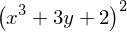

In [238]:
expr1 = (x ** 3 + 3 * y + 2) ** 2
expr1

In [239]:
expr1_exp = expr1.expand()
expr1_exp

2do  ejemplo
### `apart()`

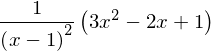

In [240]:
expr2 = (3 * x ** 2 - 2 * x + 1) / (x - 1) ** 2
expr2

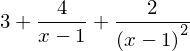

In [134]:
expr2.apart()

3er ejemplo
### `factor()`

In [241]:
expr3 = x ** 3 + 9 * x ** 2 + 27 * x + 27
expr3

In [242]:
expr3.factor()

4to ejemplo
### `expand()` como función

In [245]:
expr4 = sin(x + 2 * y)
expr4

In [246]:
expand(expr4)

5to ejemplo
### `expand_trig()` expansión trigonométrica

In [250]:
expand_trig(expr4)

In [251]:
expand(expr4, trig=True)

# Derivadas

Puedes derivar una expresion usando el método `.diff()` y la función `dif()`

Creamos una expresión y obtenemos la derivada primera con funcion

In [253]:
expr = cos(x)
diff(expr, x)

Utilizando método

In [254]:
expr.diff(x)

__Tercera derivada__

In [255]:
expr.diff(x, x, x)

In [256]:
k = symbols('k')

In [257]:
expo = E**(k*x)

In [258]:
expo.diff(x, x, x)

In [259]:
expr.diff(x, 3)

In [260]:
expo.diff(x, 3)

__Trabajar con varias variables__  
En este ejemplo, con dos variables $x$ e $y$

In [262]:
expr_xy = y ** 3 * sin(x) ** 2 + x ** 2 * cos(y)
expr_xy

Derivemos

In [264]:
diff(expr_xy, x, 1, y, 1)

Derivada segunda

In [265]:
diff(expr_xy, x, 2, y, 2)

__Si queremos que la deje indicada__, usamos `Derivative()`

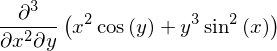

In [266]:
Derivative(expr_xy, x, 2, y)

__Aplicar la regla de la cadena con SymPy__

### Function
Creamos una función F con la palabra "Function"

In [268]:
F = Function('F')
F(x)

Creamos otra función G

In [269]:
G = Function('G')
G(x)

- Y calculemos la derivada en cadena
$$\frac{d}{d x} F{\left (G(x) \right )} $$

Derivamos la función compuesta F(G(x))

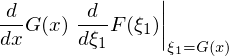

In [270]:
F(G(x)).diff(x)

En un caso en el que conocemos las funciones:  
definimos una f

In [271]:
f = 2 * y * exp(x)
f

definimos una g(f)

In [272]:
g = f **2 * cos(x) + f
g

la derivamos

In [273]:
diff(g,x)

# Integrales

__Usando el método `.integrate()` o la función `integrate()`__,  
integremos estas funciones:

$$\int{\cos(x)^2}dx$$
$$\int{\frac{dx}{\sin(x)}}$$
$$\int{\frac{dx}{(x^2+a^2)^2}}$$



In [275]:
int1 = cos(x) ** 2
int1

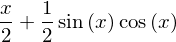

In [276]:
integrate(int1)

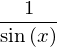

In [277]:
int2 =  1 / sin(x)
int2

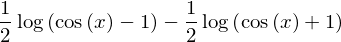

In [278]:
integrate(int2)

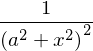

In [279]:
x, a = symbols('x a', real=True)

int3 = 1 / (x**2 + a**2)**2
int3

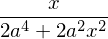

In [280]:
integrate(int3, x)

# Límites

Calculemos el siguiente límite:

$$\lim_{x \to 0} \left(\frac{x}{\tan{\left (x \right )}}\right)^{\frac{1}{x^{2}}}$$

Primero creamos la expresión:

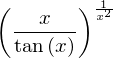

In [281]:
x = symbols('x', real=True)
expr = (x / tan(x)) ** (1 / x**2)
expr

Obtenemos el límite con la función `limit()` y si queremos dejarlo indicado, podemos usar `Limit()`:

In [282]:
limit(expr, x, 0)

Otro caso

In [285]:
limit(sin(x)/x,x,0)

Otro ejemplo

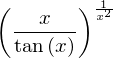

In [289]:
g = (x / tan(x))**(1/x**2)
g

In [290]:
limit(g,x,0)

Supongamos que queremos que nos quede expresado, no queremos que nos dé un número, 
para ello usamos el comando "Limit", con la L mayúscula, esto es:

In [284]:
Limit(expr, x, 0)

NameError: name 'Limit' is not defined

In [286]:
Limit(sin(x)/x,x,0)

NameError: name 'Limit' is not defined

Observemos que calcula el límite desde la derecha, pues expresa +0.

In [296]:
limit((1-x)/x,x,0,'+')

Observemos que calcula el límite desde la izquierda, pues expresa -0.

In [297]:
limit((1-x)/x,x,0,'-')

El símbolo $\infty$ se lo expresa con `oo`

In [287]:
limit(x, 1/x, oo)

NameError: name 'oo' is not defined

Ahora tomemos la misma ecuación, pero le pidamos que calcule el límite en x que tiende a infinito,
para ello usamos el símbolo oo, es decir:

In [288]:
#limit(sin(x)/x,x,oo)
limit(sin(x)/x,x,oo)

NameError: name 'oo' is not defined

# Series

Los desarrollos en serie se pueden llevar a cabo con el método `.series()` o la función `series()`

Creamos la expresión

In [298]:
expr = exp(x)
expr

La desarrollamos en serie

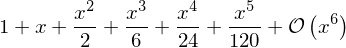

In [299]:
series(expr)

Se puede especificar el número de términos pasándole un argumento `n=...`.  
El número que le pasemos será el primer término que desprecie.

Indicando el número de términos

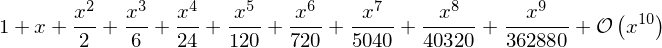

In [300]:
series(expr, n=10)

Si nos molesta el $\mathcal{O}(x^{10})$ lo podemos quitar con `removeO()`:

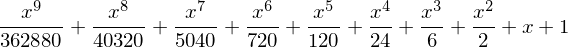

In [301]:
series(expr, n=10).removeO()

Otro ejemplo

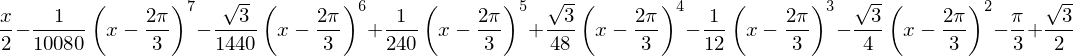

In [302]:
series(sin(x), n=8, x0=pi/3).removeO().subs(x, x-pi/3)

---

## Resolución de ecuaciones

## `solve()`

Como se ha mencionado anteriormente las ecuaciones no se pueden crear con el `=`

Creamos la ecuación

In [303]:
ecuacion = Eq(x ** 2 - x, 3)
ecuacion

la resolvemos

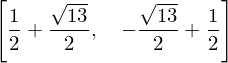

In [304]:
solve(ecuacion)

## Pero algunas veces necesitamos resolver con símbolos,
$$a e^{\frac{x}{t}} = C$$

Creamos los símbolos y la ecuación

In [305]:
a, x, t, C = symbols('a, x, t, C', real=True)
ecuacion = Eq(a * exp(x/t), C)
ecuacion

La resolvemos

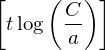

In [306]:
solve(ecuacion ,x)

Si consultamos la ayuda, vemos que las posibilidades y el número de parámetros son muchos, no vamos a entrar ahora en ellos.

## Ecuaciones diferenciales

Tratemos de resolver, por ejemplo:

$$y{\left (x \right )} + \frac{d}{d x} y{\left (x \right )} + \frac{d^{2}}{d x^{2}}  y{\left (x \right )} = \cos{\left (x \right )}$$

## `dsolve()`

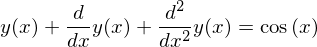

In [308]:
x = symbols('x')
f = Function('y')
ecuacion_dif = Eq(f(x).diff(x,2) + f(x).diff(x) + f(x), cos(x))
ecuacion_dif

resolvemos

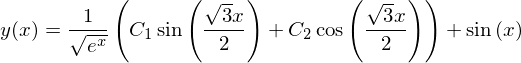

In [309]:
dsolve(ecuacion_dif, f(x))

# Matrices

Creamos una matriz llena de símbolos

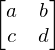

In [310]:
a, b, c, d = symbols('a b c d')
A = Matrix([
            [a, b],
            [c, d]
    ])
A

Determinemos los autovalores
## `eigenvals()`

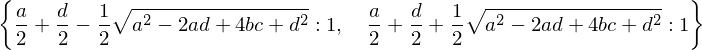

In [312]:
A.eigenvals()

Calculemos las inversa de la matriz
## `inv()`

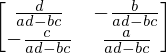

In [313]:
A.inv()

Elevamos al cuadrado la matriz

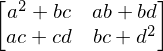

In [314]:
A ** 2

---

_ Esto ha sido un recorrido simple por algunas de las posibilidades que ofrece SymPy.  
El cálculo simbólico es un terreno díficil y este paquete avanza a pasos agigantados gracias a un grupo de desarrolladores siempre dispuestos a mejorar y escuchar sugerencias.  
Sus posibilidades no acaban aquí.